<a href="https://colab.research.google.com/github/VikaBilyk/mss/blob/main/mss-lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Домінуючі частоти: [14.97005988 21.95608782]


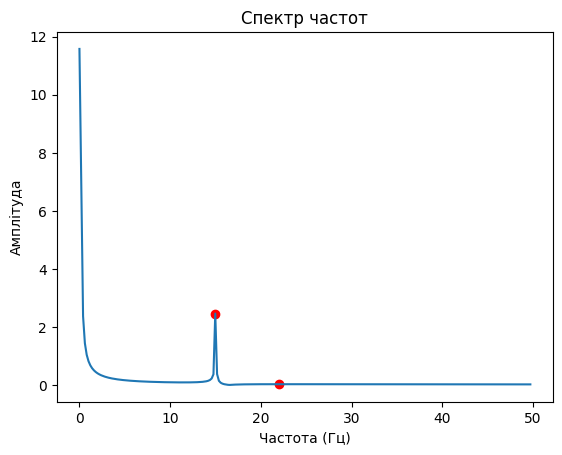

Підібрані параметри: [ 1.20790442 -8.78860752  9.48618611  2.43884435 -0.49395448  0.12860965
 -0.24639401]


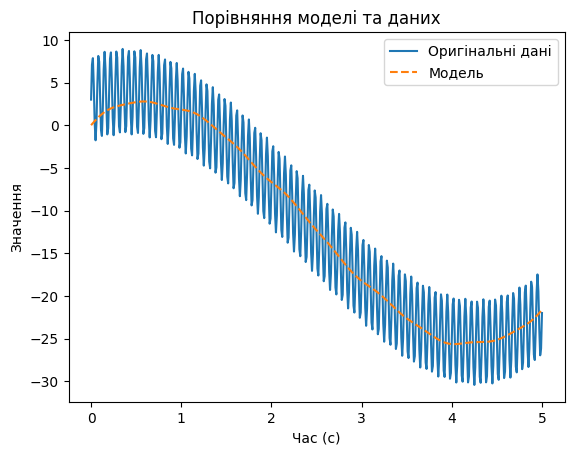

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.optimize import curve_fit

# Читання даних з файлу
data_points = np.loadtxt('f2.txt')

# Встановлення параметрів часового інтервалу
total_duration = 5
num_samples = len(data_points)
sampling_interval = 0.01
time_series = np.arange(0, num_samples * sampling_interval, sampling_interval)

# 1. Обчислення дискретного перетворення Фур'є
def perform_fft(signal, num_samples, sampling_interval):
    fft_values = np.fft.fft(signal) / num_samples
    freq_values = np.fft.fftfreq(num_samples, sampling_interval)
    return fft_values, freq_values

# Виклик функції ДПФ
fft_results, freq_range = perform_fft(data_points, num_samples, sampling_interval)

# 2. Визначення амплітуди сигналу та пошук пікових значень
amplitude_spectrum = np.abs(fft_results)

# Функція для пошуку основних частот
def find_significant_peaks(spectrum, limit):
    peaks_idx, _ = find_peaks(spectrum[:limit])
    return peaks_idx

# Знаходимо пікові частоти
significant_peaks_idx = find_significant_peaks(amplitude_spectrum, num_samples // 2)
dominant_frequencies = freq_range[significant_peaks_idx]

print("Домінуючі частоти:", dominant_frequencies)

# 3. Побудова графіка спектру
def plot_spectrum(frequencies, amplitude, peaks, title='Спектр частот'):
    plt.figure()
    plt.plot(frequencies, amplitude)
    plt.scatter(frequencies[peaks], amplitude[peaks], color='red')
    plt.xlabel('Частота (Гц)')
    plt.ylabel('Амплітуда')
    plt.title(title)
    plt.show()

# Відображення спектра з піками
plot_spectrum(freq_range[:num_samples // 2], amplitude_spectrum[:num_samples // 2], significant_peaks_idx)

# 4. Створення моделі для апроксимації
def sine_wave_model(t, a1, a2, a3, *params):
    num_harmonics = len(params) // 2
    result = a1 * t**3 + a2 * t**2 + a3 * t
    for i in range(num_harmonics):
        frequency = params[i]
        amplitude = params[num_harmonics + i]
        result += amplitude * np.sin(2 * np.pi * frequency * t - 3 * t)
    return result

# 5. Використання методу найменших квадратів для підбору параметрів
initial_coefficients = [1, 1, 1] + [1] * (len(dominant_frequencies) * 2)

# Підбір параметрів для моделі
def fit_model(time, data, initial_guess):
    optimal_params, param_cov = curve_fit(sine_wave_model, time, data, p0=initial_guess)
    return optimal_params

# Отримання оптимальних параметрів
optimal_parameters = fit_model(time_series, data_points, initial_coefficients)
print("Підібрані параметри:", optimal_parameters)

# 6. Генерація значень за моделлю
def generate_fitted_curve(time, params):
    return sine_wave_model(time, *params)

# Побудова апроксимованих даних
fitted_curve = generate_fitted_curve(time_series, optimal_parameters)

# 7. Візуалізація результатів
def plot_fitted_data(time, original_data, fitted_data, title='Порівняння моделі та даних'):
    plt.figure()
    plt.plot(time, original_data, label='Оригінальні дані')
    plt.plot(time, fitted_data, label='Модель', linestyle='--')
    plt.xlabel('Час (с)')
    plt.ylabel('Значення')
    plt.legend()
    plt.title(title)
    plt.show()

# Відображення результатів
plot_fitted_data(time_series, data_points, fitted_curve)
